In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *
from idea import dynamic_IDEA

EXPERIMENT_ID = 6
TRIAL_ID = 0

Ramię musi pokonać jedną z wąskich, dość długich szczelin. Szczeliny poruszają się okresowo w obu kierunkach, cel wykonuje niewielkie losowe ruchy.

In [2]:
%%time
random_state(f"rng_states/experiment{EXPERIMENT_ID}.npy")

S = [0.6] * 40
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 4

rectangle_lists = [
    [((i - 0.85, 3), (i + 0.85, 6)) for i in range(-6, 7, 2)],
    [((i - 1.85, 3), (i - 0.15, 6)) for i in range(-6, 7, 2)],
] * 2
targets = np.array([0., 8.]) + np.random.uniform(-0.5, 0.5, size=(T, 2))
objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangle_lists[0])

n = 500
alpha_inf = 0.8
n_immigrants = 150
eta_c = 5.
eta_m = 30.
p_c = 0.9
p_m = 0.025
num_iterations_init = 300
num_iterations = 160

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)
TRIAL_ID += 1
np.savez(f"/tmp/histories/experiment{EXPERIMENT_ID}_{TRIAL_ID}", populations=population_hist, scores=score_hist)

t=0
Iteration 0, #feasible: 261, best: [23.57732618], #infeasible: 239, best: [0.62012177 1.        ]


/home/i291318/Dynamic-inverse-kinematics/simulation.py:34: RuntimeWarning: divide by zero encountered in true_divide
  t = _vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:35: RuntimeWarning: divide by zero encountered in true_divide
  u = _vector_product(x2 - x1, d1) / rs


Iteration 20, #feasible: 100, best: [15.90378241], #infeasible: 400, best: [5.85374137e-04 1.00000000e+00]
Iteration 40, #feasible: 100, best: [11.94398196], #infeasible: 400, best: [5.85374137e-04 1.00000000e+00]
Iteration 60, #feasible: 100, best: [11.94398196], #infeasible: 400, best: [2.94002345e-04 1.00000000e+00]
Iteration 80, #feasible: 100, best: [11.94398196], #infeasible: 400, best: [2.05920513e-05 1.00000000e+00]
Iteration 100, #feasible: 100, best: [11.94398196], #infeasible: 400, best: [1.40384796e-05 1.00000000e+00]
Iteration 120, #feasible: 100, best: [11.94398196], #infeasible: 400, best: [6.91655558e-07 1.00000000e+00]
Iteration 140, #feasible: 100, best: [11.94398196], #infeasible: 400, best: [6.91655558e-07 1.00000000e+00]
Iteration 160, #feasible: 100, best: [11.94398196], #infeasible: 400, best: [6.10261815e-07 1.00000000e+00]
Iteration 180, #feasible: 100, best: [11.94398196], #infeasible: 400, best: [1.19381566e-07 1.00000000e+00]
Iteration 200, #feasible: 100, b

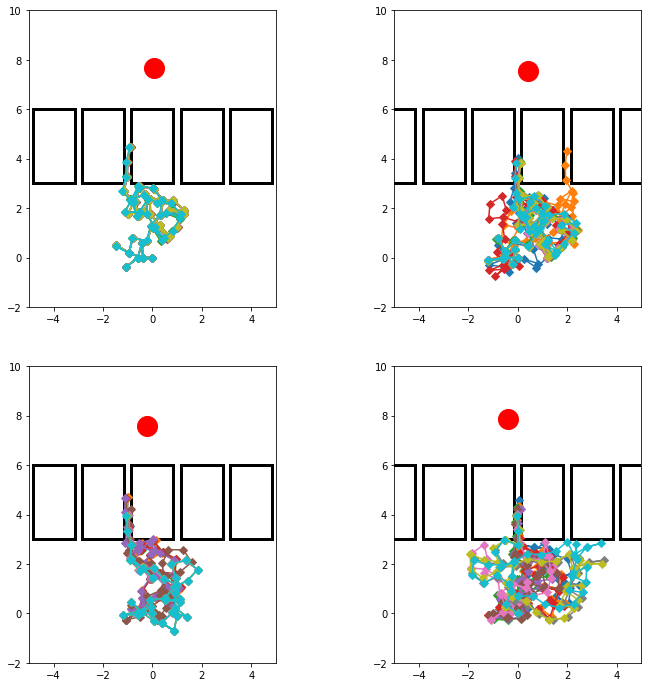

In [3]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    best = np.argsort(scores[-1, mask, 0])[:10]
    feasible_populations.append(feasible_population[best])
    
draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=2, ncols=2, figsize=(12, 12), xlim=(-5, 5), ylim=(-2, 10))

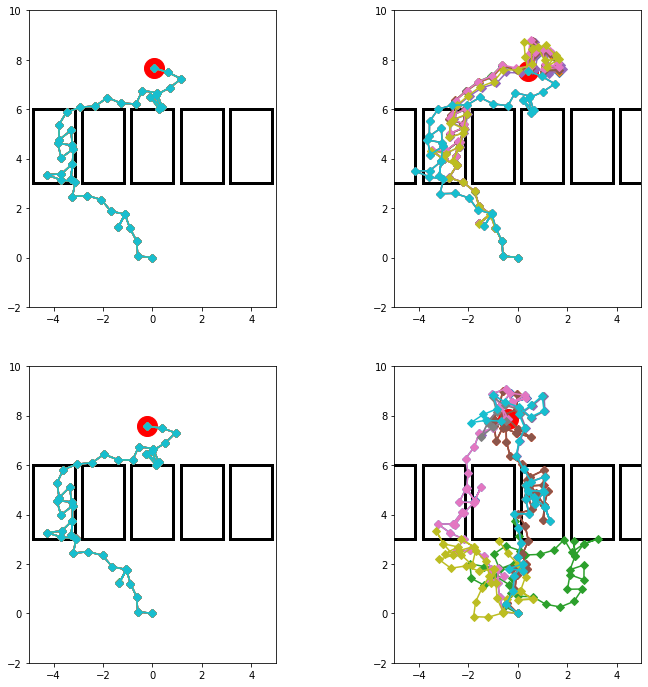

In [4]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population[::sum(~mask) // 10])
    
draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=2, ncols=2, figsize=(12, 12), xlim=(-5, 5), ylim=(-2, 10))


In [5]:
%%time
random_state(f"rng_states/experiment{EXPERIMENT_ID}.npy")

S = [0.6] * 40
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 4

rectangle_lists = [
    [((i - 0.85, 3), (i + 0.85, 6)) for i in range(-8, 9, 2)],
    [((i - 1.85, 3), (i - 0.15, 6)) for i in range(-8, 9, 2)],
] * 2
targets = np.array([0., 8.]) + np.random.uniform(-0.5, 0.5, size=(T, 2))
objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangle_lists[0])

n = 500
alpha_inf = 0.8
n_immigrants = 150
eta_c = 5.
eta_m = 30.
p_c = 0.9
p_m = np.full(d, 0.025)
p_m[-10:] = np.linspace(0.025, 0.1, 10)
num_iterations_init = 300
num_iterations = 160

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)
TRIAL_ID += 1
np.savez(f"/tmp/histories/experiment{EXPERIMENT_ID}_{TRIAL_ID}", populations=population_hist, scores=score_hist)

t=0
Iteration 0, #feasible: 264, best: [22.59710147], #infeasible: 236, best: [0.62012177 1.        ]


/home/i291318/Dynamic-inverse-kinematics/simulation.py:34: RuntimeWarning: divide by zero encountered in true_divide
  t = _vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:35: RuntimeWarning: divide by zero encountered in true_divide
  u = _vector_product(x2 - x1, d1) / rs


Iteration 20, #feasible: 100, best: [16.68049731], #infeasible: 400, best: [0.0081132 1.       ]
Iteration 40, #feasible: 100, best: [16.68049731], #infeasible: 400, best: [2.06666405e-04 1.00000000e+00]
Iteration 60, #feasible: 100, best: [16.68049731], #infeasible: 400, best: [2.06666405e-04 1.00000000e+00]
Iteration 80, #feasible: 100, best: [16.68049731], #infeasible: 400, best: [2.06666405e-04 1.00000000e+00]
Iteration 100, #feasible: 100, best: [14.33550034], #infeasible: 400, best: [8.29490777e-05 1.00000000e+00]
Iteration 120, #feasible: 100, best: [14.33550034], #infeasible: 400, best: [8.29490777e-05 1.00000000e+00]
Iteration 140, #feasible: 100, best: [0.09051482], #infeasible: 400, best: [2.02184472e-05 1.00000000e+00]
Iteration 160, #feasible: 100, best: [0.00085568], #infeasible: 400, best: [2.02184472e-05 1.00000000e+00]
Iteration 180, #feasible: 100, best: [2.69271614e-07], #infeasible: 400, best: [4.10452786e-07 1.00000000e+00]
Iteration 200, #feasible: 100, best: [2.6

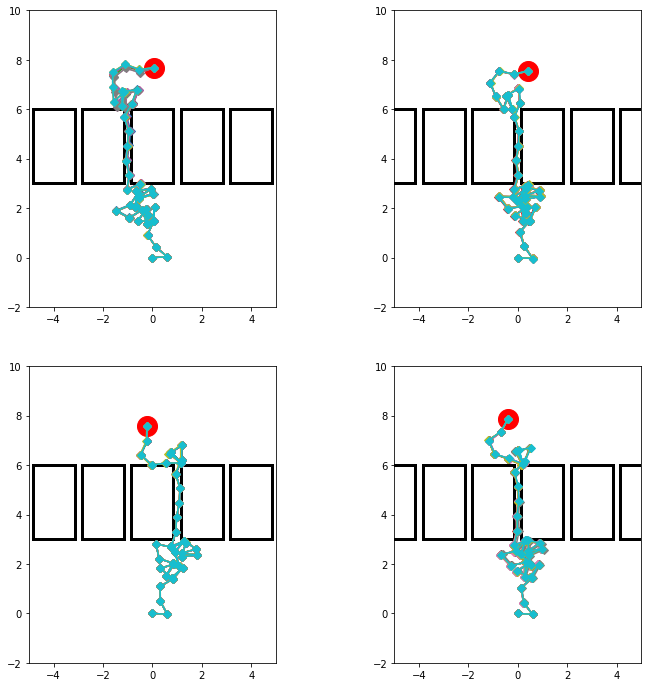

In [6]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    best = np.argsort(scores[-1, mask, 0])[:10]
    feasible_populations.append(feasible_population[best])
    
draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=2, ncols=2, figsize=(12, 12), xlim=(-5, 5), ylim=(-2, 10))

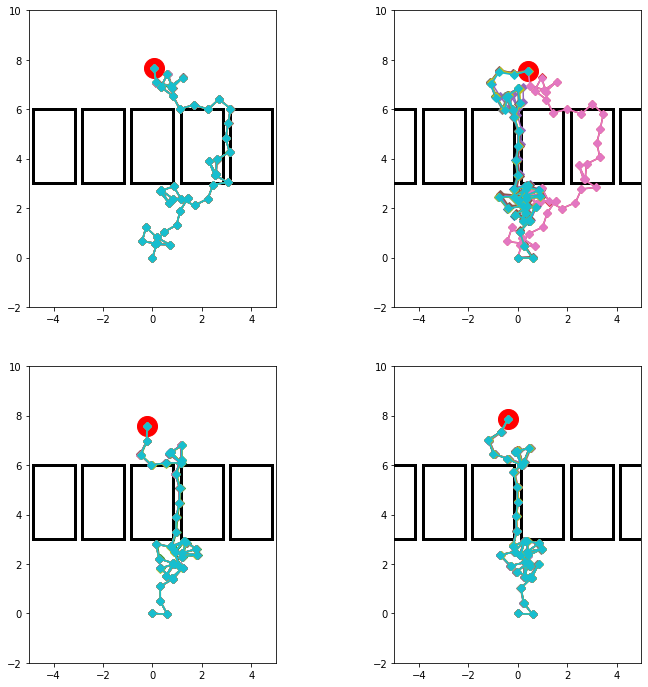

In [7]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population[::sum(~mask) // 10])
    
draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=2, ncols=2, figsize=(12, 12), xlim=(-5, 5), ylim=(-2, 10))
